In [ ]:
import os
import pandas as pd
import re

base_dir = "/home/ssahin/Desktop/temp_90ligand/temp_expPDB"
os.chdir(base_dir)  # optional

all_results = []

folder_pattern = re.compile(r'^([A-Z0-9]+)_(\w+)_P(\d+)_dock$')

for uniprot in os.listdir(base_dir):
    uniprot_path = os.path.join(base_dir, uniprot)
    if os.path.isdir(uniprot_path):
        for subfolder in os.listdir(uniprot_path):
            match = folder_pattern.match(subfolder)
            if match:
                uniprot_code, pdbcode, pocket_number = match.groups()
                result_file = os.path.join(uniprot_path, subfolder, 'final_results.csv')
                if os.path.isfile(result_file):
                    df = pd.read_csv(result_file)
                    df['uniprot'] = uniprot_code
                    df['pocket_number'] = pocket_number
                    df['pdbcode'] = pdbcode
                    all_results.append(df)

final_df = pd.concat(all_results, ignore_index=True)

In [3]:
final_df

,Tool1,Tool2,PoseNumber1,PoseNumber2,Score1,Score2,File1,File2,RMSD,uniprot,pocket_number,pdbcode
0,LeDock,Smina,7,7,-4.97,-6.59740,complex_7.pdb,complex_7.pdb,5.460414,P00918,0,3ryj
1,LeDock,Smina,7,11,-4.97,-6.48773,complex_7.pdb,complex_11.pdb,4.923903,P00918,0,3ryj
2,LeDock,Smina,7,8,-4.97,-6.59556,complex_7.pdb,complex_8.pdb,5.523311,P00918,0,3ryj
3,LeDock,Smina,7,6,-4.97,-6.75185,complex_7.pdb,complex_6.pdb,5.458708,P00918,0,3ryj
4,LeDock,Smina,7,15,-4.97,-6.36851,complex_7.pdb,complex_15.pdb,5.093316,P00918,0,3ryj
...,...,...,...,...,...,...,...,...,...,...,...,...
33468,GOLD,Smina,4,19,74.01,-7.69393,complex_4.pdb,complex_19.pdb,18.198258,P10275,0,3b5r
33469,GOLD,Smina,4,5,74.01,-8.95127,complex_4.pdb,complex_5.pdb,15.604475,P10275,0,3b5r
33470,GOLD,Smina,4,12,74.01,-8.21080,complex_4.pdb,complex_12.pdb,17.042071,P10275,0,3b5r
33471,GOLD,Smina,4,9,74.01,-8.52211,complex_4.pdb,complex_9.pdb,13.739342,P10275,0,3b5r


In [4]:
# Sort Score1 and Score2 in ascending order
final_df_asc = final_df.sort_values(by=['Score1', 'Score2'], ascending=True)

# Sort Score1 and Score2 in descending order
final_df_desc = final_df.sort_values(by=['Score1', 'Score2'], ascending=False)

In [5]:
final_df_asc_score1 = final_df.sort_values(by=['Score1'], ascending=True)
final_df_asc_score2 = final_df.sort_values(by=['Score2'], ascending=True)
final_df_desc_score1 = final_df.sort_values(by=['Score1'], ascending=False)
final_df_desc_score2 = final_df.sort_values(by=['Score2'], ascending=False)

In [6]:
final_df_asc

,Tool1,Tool2,PoseNumber1,PoseNumber2,Score1,Score2,File1,File2,RMSD,uniprot,pocket_number,pdbcode
14740,LeDock,Smina,1,1,-10.13,-11.37804,complex_1.pdb,complex_1.pdb,6.753109,P56817,3,2vkm
14738,LeDock,Smina,1,2,-10.13,-11.37763,complex_1.pdb,complex_2.pdb,6.901691,P56817,3,2vkm
14741,LeDock,Smina,1,3,-10.13,-11.26524,complex_1.pdb,complex_3.pdb,6.948116,P56817,3,2vkm
14748,LeDock,Smina,1,4,-10.13,-10.32402,complex_1.pdb,complex_4.pdb,6.908566,P56817,3,2vkm
14745,LeDock,Smina,1,5,-10.13,-10.12300,complex_1.pdb,complex_5.pdb,6.893985,P56817,3,2vkm
...,...,...,...,...,...,...,...,...,...,...,...,...
15344,GOLD,Smina,3,1,109.49,-14.26232,complex_3.pdb,complex_1.pdb,6.702646,P07900,0,2yki
15343,GOLD,Smina,3,2,109.49,-14.20816,complex_3.pdb,complex_2.pdb,6.832554,P07900,0,2yki
15345,GOLD,Smina,3,3,109.49,-14.05362,complex_3.pdb,complex_3.pdb,6.909467,P07900,0,2yki
15347,GOLD,Smina,3,4,109.49,-13.93286,complex_3.pdb,complex_4.pdb,6.700237,P07900,0,2yki


In [7]:
final_df['uniprot_pdbcode']= final_df['uniprot'] + '_' + final_df['pdbcode']
final_df.head()

,Tool1,Tool2,PoseNumber1,PoseNumber2,Score1,Score2,File1,File2,RMSD,uniprot,pocket_number,pdbcode,uniprot_pdbcode
0,LeDock,Smina,7,7,-4.97,-6.59740,complex_7.pdb,complex_7.pdb,5.460414,P00918,0,3ryj,P00918_3ryj
1,LeDock,Smina,7,11,-4.97,-6.48773,complex_7.pdb,complex_11.pdb,4.923903,P00918,0,3ryj,P00918_3ryj
2,LeDock,Smina,7,8,-4.97,-6.59556,complex_7.pdb,complex_8.pdb,5.523311,P00918,0,3ryj,P00918_3ryj
3,LeDock,Smina,7,6,-4.97,-6.75185,complex_7.pdb,complex_6.pdb,5.458708,P00918,0,3ryj,P00918_3ryj
4,LeDock,Smina,7,15,-4.97,-6.36851,complex_7.pdb,complex_15.pdb,5.093316,P00918,0,3ryj,P00918_3ryj


In [8]:
# For each unique uniprot_ligcode, how many rows showed an RMSD value lower than 2.0?
rmsd_counts = final_df[final_df['RMSD'] < 2.0].groupby('uniprot_pdbcode').size().reset_index(name='count')

In [9]:
rmsd_counts

,uniprot_pdbcode,count
0,O14757_1nvq,14
1,O14965_3e5a,7
2,O14965_3myg,10
3,O14965_3uo4,6
4,O60674_4e6q,45
5,O60674_4jia,4
6,O60885_4wiv,26
7,P00519_3pyy,4
8,P00519_4twp,3
9,P00749_1owh,11


In [10]:
# For each unique uniprot_ligcode, how many rows are between PoseNumber1 = 1 and PoseNumber2 = 1 and showed an RMSD value lower than 2.0?
pose_counts = final_df[(final_df['PoseNumber1'] == 1) & (final_df['PoseNumber2'] == 1) & (final_df['RMSD'] < 2.0)].groupby('uniprot_pdbcode').size().reset_index(name='count')

In [11]:
pose_counts

,uniprot_pdbcode,count
0,O14757_1nvq,3
1,O14965_3myg,1
2,O60674_4e6q,1
3,P03372_1qkt,1
4,P03372_2p15,3
5,P03372_2pog,3
6,P03372_2qe4,1
7,P07900_2yki,1
8,P23458_4ivb,1
9,P23458_4k77,1


In [12]:
# For each unique uniprot_ligcode, how many of them showed an RMSD value lower than 2.0 with at least three different Tool1 and Tool2 combinations? also add tool names to the df
tool_counts = final_df[final_df['RMSD'] < 2.0].groupby('uniprot_pdbcode').apply(lambda x: x[['Tool1', 'Tool2']].drop_duplicates().shape[0]).reset_index(name='unique_tool_combinations')


In [13]:
#add tool names to the df
tool_counts_withnames = (
    final_df[final_df['RMSD'] < 2.0]
    .groupby('uniprot_pdbcode')
    .apply(lambda x: pd.Series({
        'unique_tool_combinations': x[['Tool1', 'Tool2']].drop_duplicates().shape[0],
        'tool_names': x[['Tool1', 'Tool2']].drop_duplicates().values.tolist()
    }))
    .reset_index()
)

In [14]:
tool_counts_withnames

,uniprot_pdbcode,unique_tool_combinations,tool_names
0,O14757_1nvq,3,"[[LeDock, GOLD], [LeDock, Smina], [GOLD, Smina]]"
1,O14965_3e5a,1,"[[LeDock, GOLD]]"
2,O14965_3myg,1,"[[LeDock, GOLD]]"
3,O14965_3uo4,1,"[[LeDock, GOLD]]"
4,O60674_4e6q,3,"[[LeDock, GOLD], [LeDock, Smina], [GOLD, Smina]]"
5,O60674_4jia,1,"[[LeDock, GOLD]]"
6,O60885_4wiv,1,"[[LeDock, GOLD]]"
7,P00519_3pyy,1,"[[LeDock, GOLD]]"
8,P00519_4twp,1,"[[LeDock, GOLD]]"
9,P00749_1owh,1,"[[LeDock, GOLD]]"


In [13]:
tool_counts

,uniprot_pdbcode,unique_tool_combinations
0,O14757_1nvq,3
1,O14965_3e5a,1
2,O14965_3myg,1
3,O14965_3uo4,1
4,O60674_4e6q,3
5,O60674_4jia,1
6,O60885_4wiv,1
7,P00519_3pyy,1
8,P00519_4twp,1
9,P00749_1owh,1


In [15]:
len(final_df['uniprot_pdbcode'].unique())

86

In [16]:
final_df.query('uniprot_pdbcode == "O14757_1nvq" & RMSD < 2.0').sort_values('RMSD')

,Tool1,Tool2,PoseNumber1,PoseNumber2,Score1,Score2,File1,File2,RMSD,uniprot,pocket_number,pdbcode,uniprot_pdbcode
22627,LeDock,GOLD,1,1,-7.80,79.98000,complex_1.pdb,complex_1.pdb,0.230581,O14757,0,1nvq,O14757_1nvq
22628,LeDock,GOLD,1,3,-7.80,80.50000,complex_1.pdb,complex_3.pdb,0.282592,O14757,0,1nvq,O14757_1nvq
22626,LeDock,GOLD,1,2,-7.80,80.36000,complex_1.pdb,complex_2.pdb,0.299610,O14757,0,1nvq,O14757_1nvq
22638,GOLD,Smina,3,1,80.50,-13.37878,complex_3.pdb,complex_1.pdb,1.333946,O14757,0,1nvq,O14757_1nvq
22634,GOLD,Smina,2,1,80.36,-13.37878,complex_2.pdb,complex_1.pdb,1.338011,O14757,0,1nvq,O14757_1nvq
22636,GOLD,Smina,1,1,79.98,-13.37878,complex_1.pdb,complex_1.pdb,1.346846,O14757,0,1nvq,O14757_1nvq
22632,LeDock,Smina,1,1,-7.80,-13.37878,complex_1.pdb,complex_1.pdb,1.361539,O14757,0,1nvq,O14757_1nvq
22624,LeDock,GOLD,2,1,-6.93,79.98000,complex_2.pdb,complex_1.pdb,1.480866,O14757,0,1nvq,O14757_1nvq
22623,LeDock,GOLD,2,2,-6.93,80.36000,complex_2.pdb,complex_2.pdb,1.496549,O14757,0,1nvq,O14757_1nvq
22625,LeDock,GOLD,2,3,-6.93,80.50000,complex_2.pdb,complex_3.pdb,1.511163,O14757,0,1nvq,O14757_1nvq


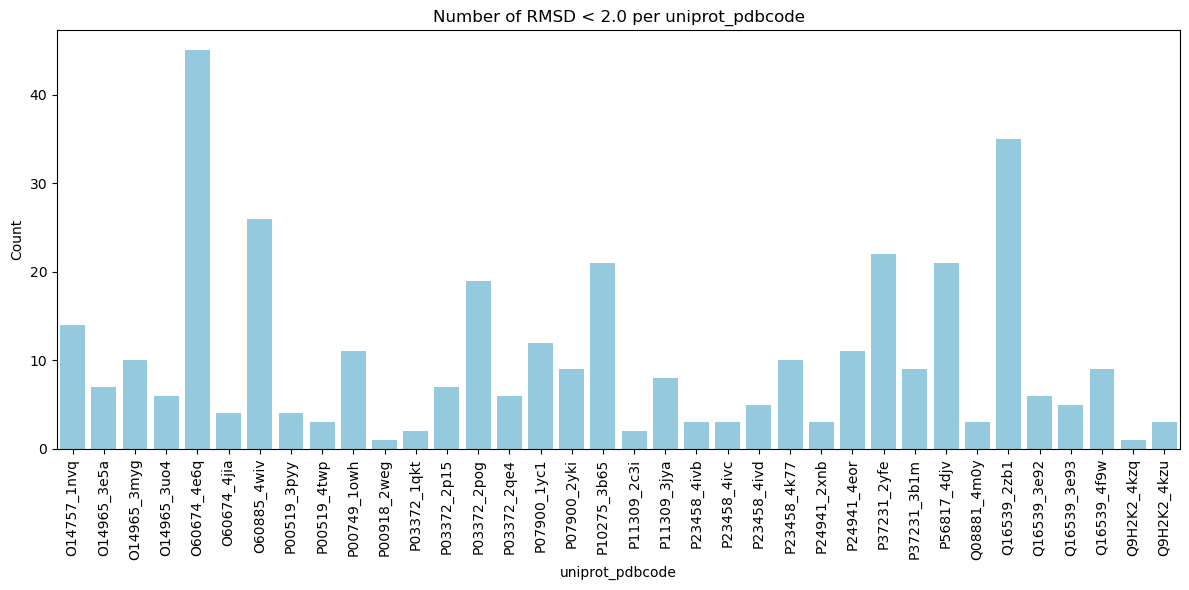

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(data=rmsd_counts, x='uniprot_pdbcode', y='count', color='skyblue')
plt.xticks(rotation=90)
plt.title('Number of RMSD < 2.0 per uniprot_pdbcode')
plt.xlabel('uniprot_pdbcode')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

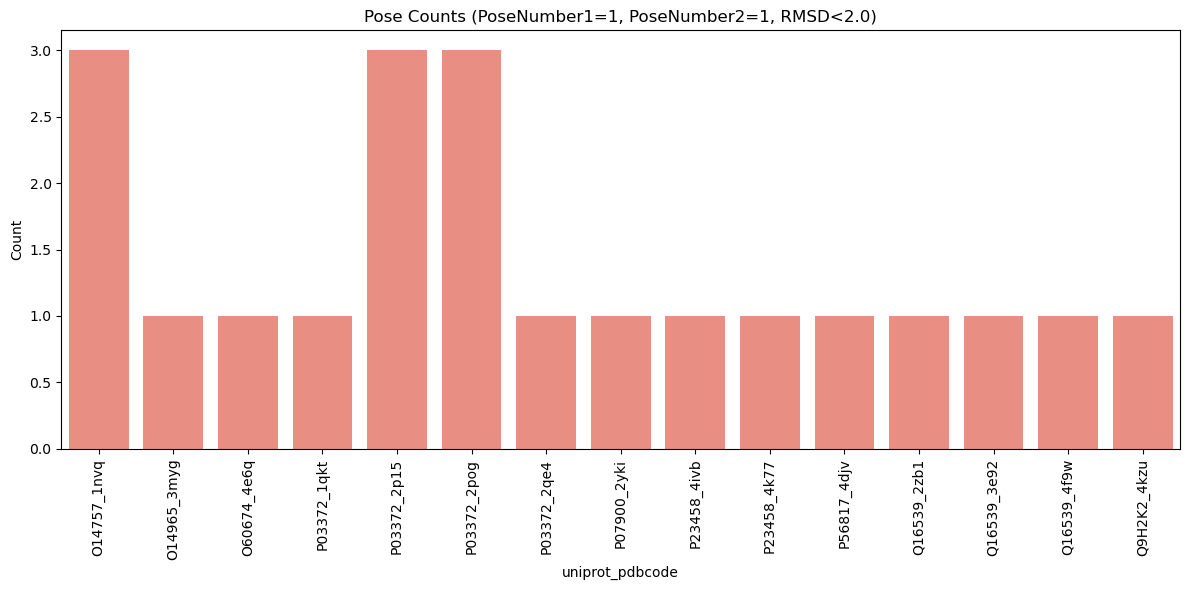

In [18]:
plt.figure(figsize=(12, 6))
sns.barplot(data=pose_counts, x='uniprot_pdbcode', y='count', color='salmon')
plt.xticks(rotation=90)
plt.title('Pose Counts (PoseNumber1=1, PoseNumber2=1, RMSD<2.0)')
plt.xlabel('uniprot_pdbcode')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

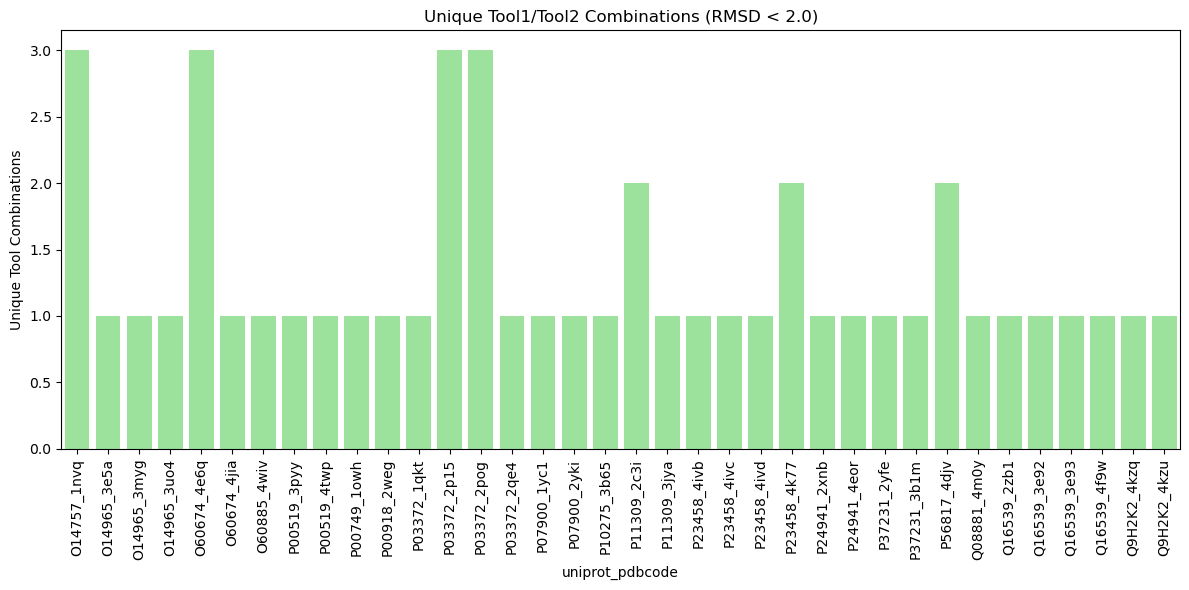

In [19]:
plt.figure(figsize=(12, 6))
sns.barplot(data=tool_counts_withnames, x='uniprot_pdbcode', y='unique_tool_combinations', color='lightgreen')
plt.xticks(rotation=90)
plt.title('Unique Tool1/Tool2 Combinations (RMSD < 2.0)')
plt.xlabel('uniprot_pdbcode')
plt.ylabel('Unique Tool Combinations')
plt.tight_layout()
plt.show()

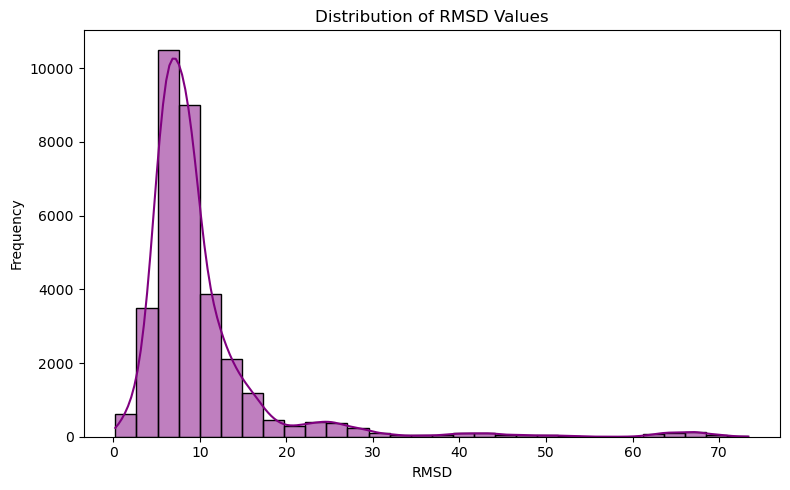

In [20]:
plt.figure(figsize=(8, 5))
sns.histplot(final_df['RMSD'], bins=30, kde=True, color='purple')
plt.title('Distribution of RMSD Values')
plt.xlabel('RMSD')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

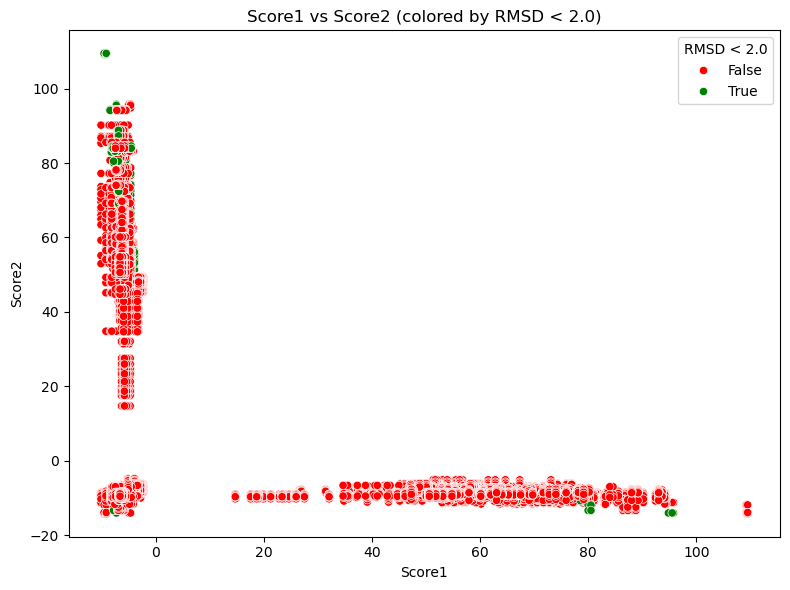

In [21]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=final_df, x='Score1', y='Score2', hue=final_df['RMSD'] < 2.0, palette={True: 'green', False: 'red'})
plt.title('Score1 vs Score2 (colored by RMSD < 2.0)')
plt.xlabel('Score1')
plt.ylabel('Score2')
plt.legend(title='RMSD < 2.0')
plt.tight_layout()
plt.show()

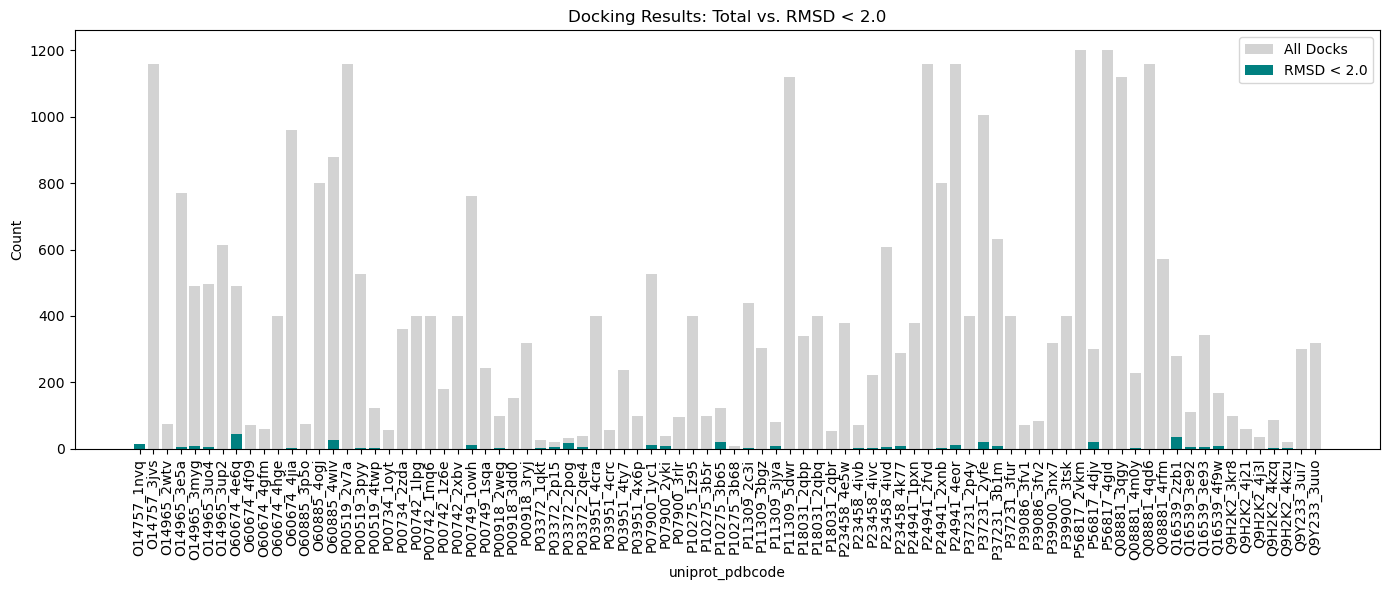

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count total and RMSD<2.0 for each uniprot_pdbcode
total_counts = final_df.groupby('uniprot_pdbcode').size().reset_index(name='total')
under2_counts = final_df[final_df['RMSD'] < 2.0].groupby('uniprot_pdbcode').size().reset_index(name='under2')

# Merge counts
merged = pd.merge(total_counts, under2_counts, on='uniprot_pdbcode', how='left').fillna(0)
merged['under2'] = merged['under2'].astype(int)

# Plot
plt.figure(figsize=(14, 6))
plt.bar(merged['uniprot_pdbcode'], merged['total'], color='lightgray', label='All Docks')
plt.bar(merged['uniprot_pdbcode'], merged['under2'], color='teal', label='RMSD < 2.0')

plt.xticks(rotation=90)
plt.xlabel('uniprot_pdbcode')
plt.ylabel('Count')
plt.title('Docking Results: Total vs. RMSD < 2.0')
plt.legend()
plt.tight_layout()
plt.show()

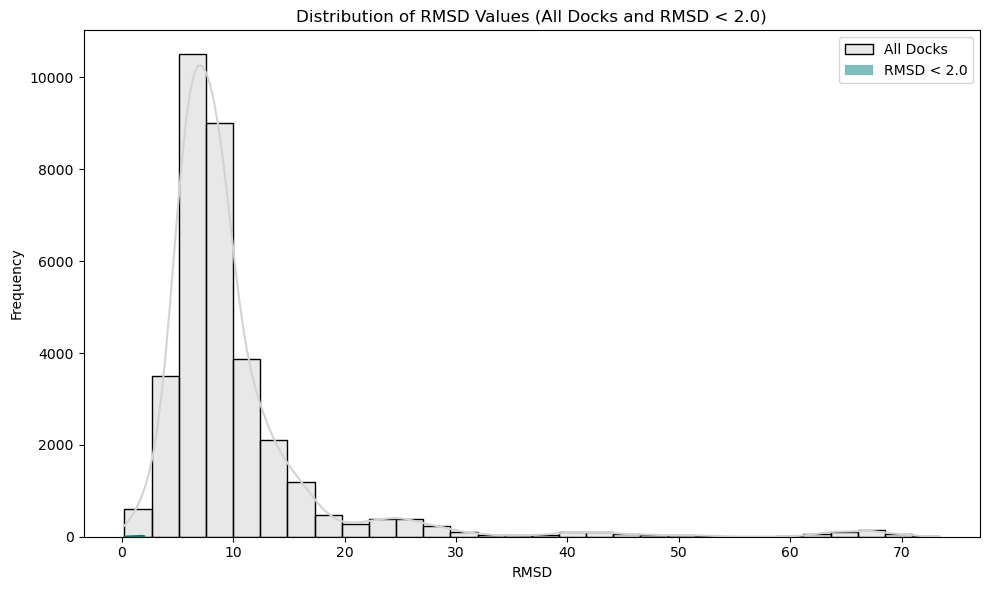

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Plot all RMSD values
sns.histplot(final_df['RMSD'], bins=30, color='lightgray', label='All Docks', kde=True)

# Overlay RMSD < 2.0
sns.histplot(final_df[final_df['RMSD'] < 2.0]['RMSD'], bins=30, color='teal', label='RMSD < 2.0', kde=True)

plt.xlabel('RMSD')
plt.ylabel('Frequency')
plt.title('Distribution of RMSD Values (All Docks and RMSD < 2.0)')
plt.legend()
plt.tight_layout()
plt.show()

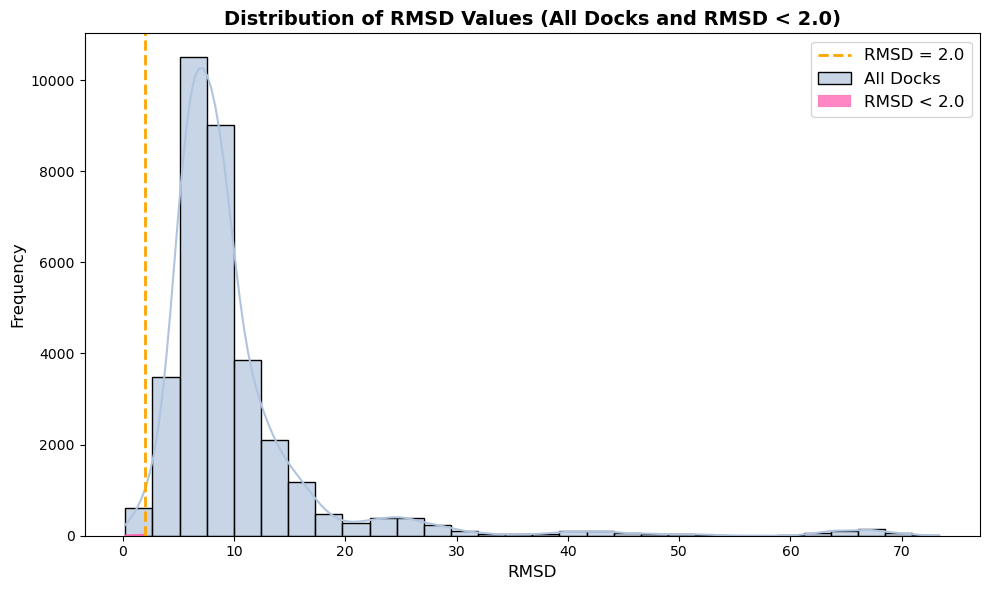

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Plot all RMSD values (background)
sns.histplot(final_df['RMSD'], bins=30, color='#B0C4DE', label='All Docks', kde=True, alpha=0.7, edgecolor='black')

# Overlay RMSD < 2.0 (highlight)
sns.histplot(final_df[final_df['RMSD'] < 2.0]['RMSD'], bins=30, color='#FF69B4', label='RMSD < 2.0', kde=True, alpha=0.8, edgecolor='black')

plt.axvline(2.0, color='orange', linestyle='--', linewidth=2, label='RMSD = 2.0')

plt.xlabel('RMSD', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of RMSD Values (All Docks and RMSD < 2.0)', fontsize=14, fontweight='bold')
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

/tmp/ipykernel_2194966/2943571719.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bar_data, x='ToolPair', y='Percent_Under_2', palette='Set2')


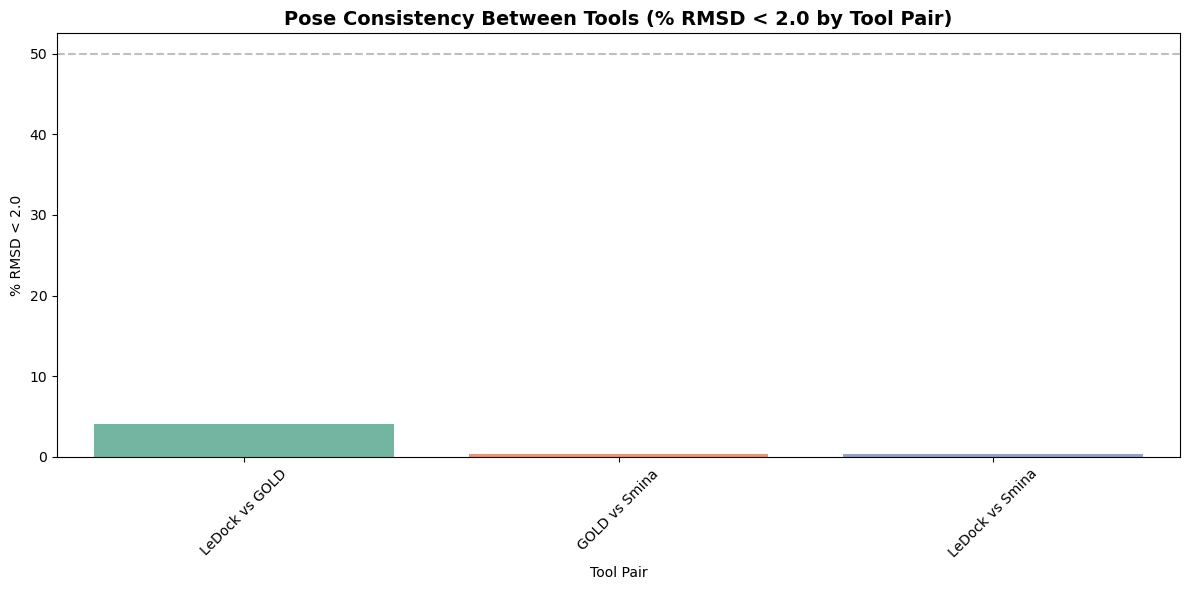

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Only keep rows with both Tool1 and Tool2 present
df_tools = final_df.dropna(subset=['Tool1', 'Tool2', 'RMSD'])

# Create a new column for tool pair
df_tools['ToolPair'] = df_tools['Tool1'].astype(str) + ' vs ' + df_tools['Tool2'].astype(str)

# Calculate % of RMSD < 2.0 for each tool pair
bar_data = (
    df_tools.groupby('ToolPair')
    .apply(lambda x: (x['RMSD'] < 2.0).mean() * 100)
    .reset_index(name='Percent_Under_2')
    .sort_values('Percent_Under_2', ascending=False)
)

plt.figure(figsize=(12, 6))
sns.barplot(data=bar_data, x='ToolPair', y='Percent_Under_2', palette='Set2')
plt.axhline(50, color='gray', linestyle='--', alpha=0.5)
plt.ylabel('% RMSD < 2.0')
plt.xlabel('Tool Pair')
plt.title('Pose Consistency Between Tools (% RMSD < 2.0 by Tool Pair)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipykernel_2194966/2740013676.py:40: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[0, 1].boxplot(box_data, labels=box_labels, patch_artist=True)


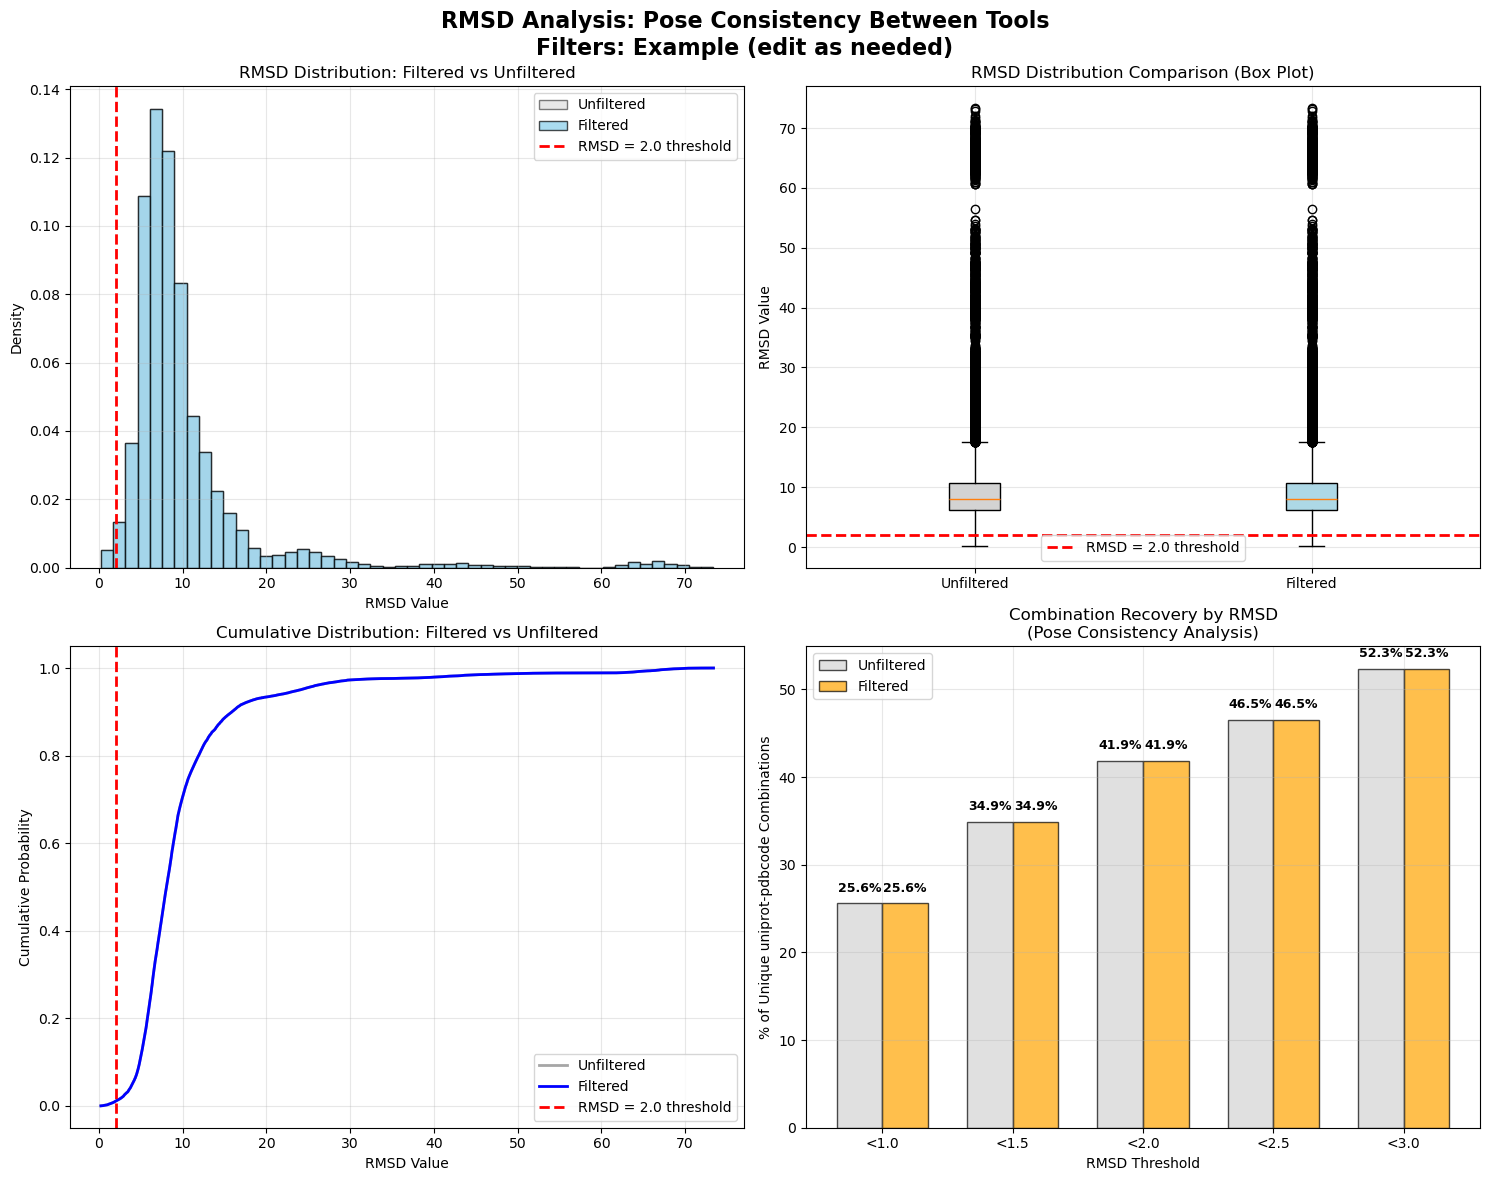

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Prepare data ---
rmsd_col = 'RMSD'
# Unfiltered RMSD values
rmsd_values_unfiltered = final_df[rmsd_col].dropna()
# Filtered RMSD values (example: RMSD < 2.0, adapt filter as needed)
filtered_df = final_df.dropna(subset=[rmsd_col])
rmsd_values_filtered = filtered_df[rmsd_col]

# Unique combination recovery by RMSD threshold
thresholds = [1.0, 1.5, 2.0, 2.5, 3.0]
def unique_combos(df, threshold):
    return df[df[rmsd_col] < threshold][['uniprot', 'pdbcode']].drop_duplicates().shape[0]
total_combos = final_df[['uniprot', 'pdbcode']].drop_duplicates().shape[0]
unique_combos_unfiltered = [unique_combos(final_df, t) for t in thresholds]
percentage_unfiltered = [v / total_combos * 100 for v in unique_combos_unfiltered]
unique_combos_filtered = [unique_combos(filtered_df, t) for t in thresholds]
percentage_filtered = [v / total_combos * 100 for v in unique_combos_filtered]

# --- Plotting ---
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('RMSD Analysis: Pose Consistency Between Tools\nFilters: Example (edit as needed)', fontsize=16, fontweight='bold')

# 1. Histogram
axes[0, 0].hist(rmsd_values_unfiltered, bins=50, alpha=0.5, color='lightgray', edgecolor='black', label='Unfiltered', density=True)
axes[0, 0].hist(rmsd_values_filtered, bins=50, alpha=0.7, color='skyblue', edgecolor='black', label='Filtered', density=True)
axes[0, 0].axvline(x=2.0, color='red', linestyle='--', linewidth=2, label='RMSD = 2.0 threshold')
axes[0, 0].set_xlabel('RMSD Value')
axes[0, 0].set_ylabel('Density')
axes[0, 0].set_title('RMSD Distribution: Filtered vs Unfiltered')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Box plot
box_data = [rmsd_values_unfiltered, rmsd_values_filtered]
box_labels = ['Unfiltered', 'Filtered']
bp = axes[0, 1].boxplot(box_data, labels=box_labels, patch_artist=True)
bp['boxes'][0].set_facecolor('lightgray')
bp['boxes'][1].set_facecolor('lightblue')
axes[0, 1].axhline(y=2.0, color='red', linestyle='--', linewidth=2, label='RMSD = 2.0 threshold')
axes[0, 1].set_ylabel('RMSD Value')
axes[0, 1].set_title('RMSD Distribution Comparison (Box Plot)')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Cumulative distribution
sorted_unfiltered = np.sort(rmsd_values_unfiltered)
cum_unfiltered = np.arange(1, len(sorted_unfiltered) + 1) / len(sorted_unfiltered)
sorted_filtered = np.sort(rmsd_values_filtered)
cum_filtered = np.arange(1, len(sorted_filtered) + 1) / len(sorted_filtered)
axes[1, 0].plot(sorted_unfiltered, cum_unfiltered, linewidth=2, color='gray', alpha=0.7, label='Unfiltered')
axes[1, 0].plot(sorted_filtered, cum_filtered, linewidth=2, color='blue', label='Filtered')
axes[1, 0].axvline(x=2.0, color='red', linestyle='--', linewidth=2, label='RMSD = 2.0 threshold')
axes[1, 0].set_xlabel('RMSD Value')
axes[1, 0].set_ylabel('Cumulative Probability')
axes[1, 0].set_title('Cumulative Distribution: Filtered vs Unfiltered')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Bar plot: % unique combinations recovered by RMSD threshold
x_pos = np.arange(len(thresholds))
width = 0.35
bars1 = axes[1, 1].bar(x_pos - width/2, percentage_unfiltered, width, alpha=0.7, color='lightgray', edgecolor='black', label='Unfiltered')
bars2 = axes[1, 1].bar(x_pos + width/2, percentage_filtered, width, alpha=0.7, color='orange', edgecolor='black', label='Filtered')
axes[1, 1].set_xlabel('RMSD Threshold')
axes[1, 1].set_ylabel('% of Unique uniprot-pdbcode Combinations')
axes[1, 1].set_title('Combination Recovery by RMSD\n(Pose Consistency Analysis)')
axes[1, 1].set_xticks(x_pos)
axes[1, 1].set_xticklabels([f'<{t}' for t in thresholds])
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)
for bar, value in zip(bars1, percentage_unfiltered):
    axes[1, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, f'{value:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=9)
for bar, value in zip(bars2, percentage_filtered):
    axes[1, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, f'{value:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

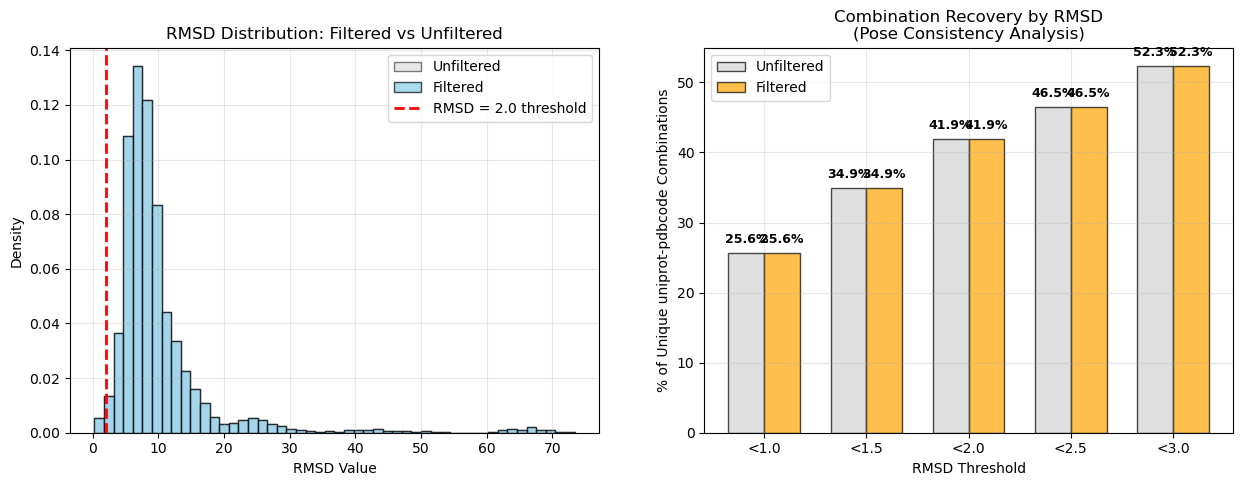

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# --- Prepare data ---
rmsd_col = 'RMSD'
rmsd_values_unfiltered = final_df[rmsd_col].dropna()
filtered_df = final_df.dropna(subset=[rmsd_col])
rmsd_values_filtered = filtered_df[rmsd_col]

thresholds = [1.0, 1.5, 2.0, 2.5, 3.0]
def unique_combos(df, threshold):
    return df[df[rmsd_col] < threshold][['uniprot', 'pdbcode']].drop_duplicates().shape[0]
total_combos = final_df[['uniprot', 'pdbcode']].drop_duplicates().shape[0]
unique_combos_unfiltered = [unique_combos(final_df, t) for t in thresholds]
percentage_unfiltered = [v / total_combos * 100 for v in unique_combos_unfiltered]
unique_combos_filtered = [unique_combos(filtered_df, t) for t in thresholds]
percentage_filtered = [v / total_combos * 100 for v in unique_combos_filtered]

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# 1. Histogram
axes[0].hist(rmsd_values_unfiltered, bins=50, alpha=0.5, color='lightgray', edgecolor='black', label='Unfiltered', density=True)
axes[0].hist(rmsd_values_filtered, bins=50, alpha=0.7, color='skyblue', edgecolor='black', label='Filtered', density=True)
axes[0].axvline(x=2.0, color='red', linestyle='--', linewidth=2, label='RMSD = 2.0 threshold')
axes[0].set_xlabel('RMSD Value')
axes[0].set_ylabel('Density')
axes[0].set_title('RMSD Distribution: Filtered vs Unfiltered')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 4. Bar plot: % unique combinations recovered by RMSD threshold
x_pos = np.arange(len(thresholds))
width = 0.35
bars1 = axes[1].bar(x_pos - width/2, percentage_unfiltered, width, alpha=0.7, color='lightgray', edgecolor='black', label='Unfiltered')
bars2 = axes[1].bar(x_pos + width/2, percentage_filtered, width, alpha=0.7, color='orange', edgecolor='black', label='Filtered')
axes[1].set_xlabel('RMSD Threshold')
axes[1].set_ylabel('% of Unique uniprot-pdbcode Combinations')
axes[1].set_title('Combination Recovery by RMSD\n(Pose Consistency Analysis)')
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels([f'<{t}' for t in thresholds])
axes[1].legend()
axes[1].grid(True, alpha=0.3)
for bar, value in zip(bars1, percentage_unfiltered):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, f'{value:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=9)
for bar, value in zip(bars2, percentage_filtered):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, f'{value:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=9)

In [3]:
def tool_specific_filter(row):
    # Check Tool1
    if row['Tool1'] == 'SMINA' and row['Score1'] <= -7:
        return True
    if row['Tool1'] == 'LeDock' and row['Score1'] <= -5:
        return True
    if row['Tool1'] == 'GOLD' and row['Score1'] >= 70:
        return True
    # Check Tool2
    if row['Tool2'] == 'SMINA' and row['Score2'] <= -7:
        return True
    if row['Tool2'] == 'LeDock' and row['Score2'] <= -5:
        return True
    if row['Tool2'] == 'GOLD' and row['Score2'] >= 70:
        return True
    return False

filtered_df = final_df[final_df.apply(tool_specific_filter, axis=1)].copy()

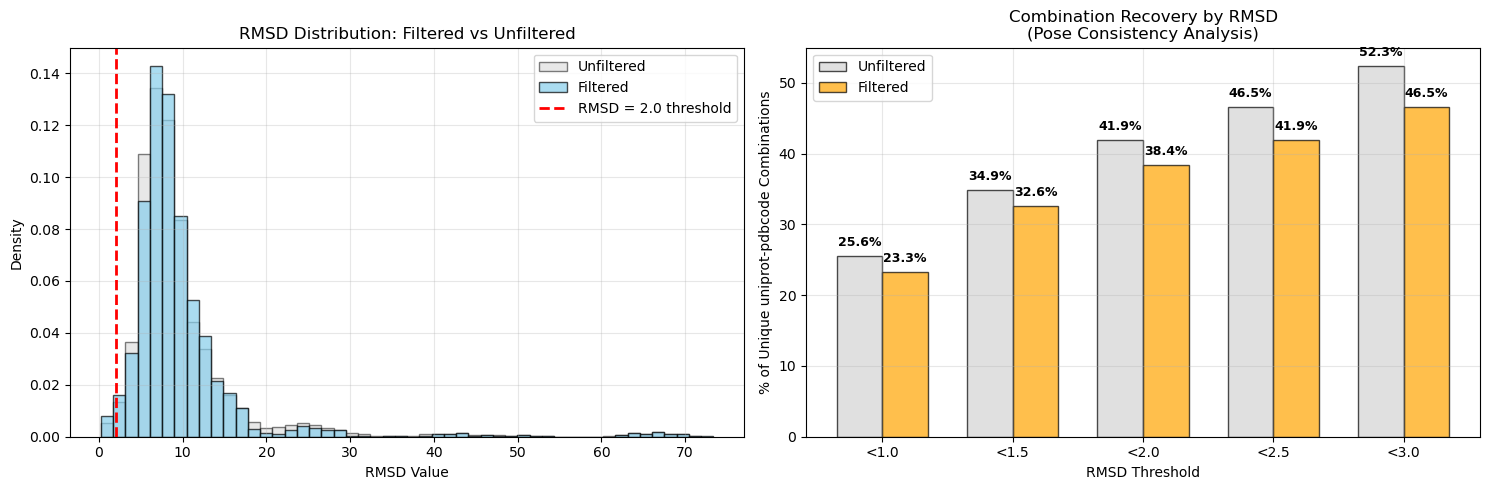

In [4]:
import matplotlib.pyplot as plt
import numpy as np

rmsd_col = 'RMSD'
rmsd_values_unfiltered = final_df[rmsd_col].dropna()
rmsd_values_filtered = filtered_df[rmsd_col].dropna()

thresholds = [1.0, 1.5, 2.0, 2.5, 3.0]
def unique_combos(df, threshold):
    return df[df[rmsd_col] < threshold][['uniprot', 'pdbcode']].drop_duplicates().shape[0]
total_combos = final_df[['uniprot', 'pdbcode']].drop_duplicates().shape[0]
unique_combos_unfiltered = [unique_combos(final_df, t) for t in thresholds]
percentage_unfiltered = [v / total_combos * 100 for v in unique_combos_unfiltered]
unique_combos_filtered = [unique_combos(filtered_df, t) for t in thresholds]
percentage_filtered = [v / total_combos * 100 for v in unique_combos_filtered]

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# 1. Histogram
axes[0].hist(rmsd_values_unfiltered, bins=50, alpha=0.5, color='lightgray', edgecolor='black', label='Unfiltered', density=True)
axes[0].hist(rmsd_values_filtered, bins=50, alpha=0.7, color='skyblue', edgecolor='black', label='Filtered', density=True)
axes[0].axvline(x=2.0, color='red', linestyle='--', linewidth=2, label='RMSD = 2.0 threshold')
axes[0].set_xlabel('RMSD Value')
axes[0].set_ylabel('Density')
axes[0].set_title('RMSD Distribution: Filtered vs Unfiltered')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 4. Bar plot: % unique combinations recovered by RMSD threshold
x_pos = np.arange(len(thresholds))
width = 0.35
bars1 = axes[1].bar(x_pos - width/2, percentage_unfiltered, width, alpha=0.7, color='lightgray', edgecolor='black', label='Unfiltered')
bars2 = axes[1].bar(x_pos + width/2, percentage_filtered, width, alpha=0.7, color='orange', edgecolor='black', label='Filtered')
axes[1].set_xlabel('RMSD Threshold')
axes[1].set_ylabel('% of Unique uniprot-pdbcode Combinations')
axes[1].set_title('Combination Recovery by RMSD\n(Pose Consistency Analysis)')
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels([f'<{t}' for t in thresholds])
axes[1].legend()
axes[1].grid(True, alpha=0.3)
for bar, value in zip(bars1, percentage_unfiltered):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, f'{value:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=9)
for bar, value in zip(bars2, percentage_filtered):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, f'{value:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()